In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from support.charting import primaryColors, fullColors, save_fig
from support.load     import loadAllData, methodParams
from support.util     import titles, order, robustOutcomeOrder

from IPython.core import display as ICD

/Users/eebart/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/eebart/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [7]:
data = loadAllData()
sns.set_style('white')

--------------------------------
Loading MOEA intertemporal
Loading archives from ../data_rand/mordm/optimize/archives_intertemporal_NSGAIIHybrid_runs50_nfe500000_scenarios10000_refScenario-1.csv
Loading convergences from ../data_rand/mordm/optimize/convergences_intertemporal_NSGAIIHybrid_runs50_nfe500000_scenarios10000_refScenario-1.csv
Loading Pareto for intertemporal
Loading pareto from ../data_rand/mordm/optimize/nondominated_intertemporal_NSGAIIHybrid_runs50_nfe500000_scenarios10000_refScenario-1.csv
Loading Robustness Summary intertemporal
Loading Robust Summary from ../data_rand/mordm/robustness/summary_intertemporal_NSGAIIHybrid_runs50_nfe500000_scenarios10000_refScenario-1.csv
--------------------------------
Loading MOEA plannedadaptive
Loading archives from ../data_rand/mordm/optimize/archives_plannedadaptive_NSGAIIHybrid_runs50_nfe100000_scenarios10000_refScenario-1.csv
Loading convergences from ../data_rand/mordm/optimize/convergences_plannedadaptive_NSGAIIHybrid_runs50_nf

In [8]:
#build dataframes to summarize robust data. This is used for most of the charts in this notebook. 
robustData = []
for method in data.keys(): 
    for model in order('model'):
        for idx, rbData in enumerate(data[method]['robusts'][model]):
            ref = idx
            if len(rbData) == 1 or idx == len(rbData) - 1: 
                ref = -1
            rb = rbData[order('outcome')]
            rb['policy'] = rbData['policy']
            rb['model'], rb['method'], rb['reference_scenario'] = [model, method, ref]
            robustData.append(rb)

robustData = pd.concat(robustData)

In [17]:
robustData.columns

Index(['max_P_percent', 'reliability_percent', 'utility_percent',
       'inertia_percent', 'policy', 'model', 'method', 'reference_scenario'],
      dtype='object')

In [21]:
dat = robustData[robustData['model']=='plannedadaptive']
dat

,max_P_percent,reliability_percent,utility_percent,inertia_percent,policy,model,method,reference_scenario
0,0.461854,0.464954,0.237976,1.0,0,plannedadaptive,mordm,0
1,0.504050,0.507749,0.200980,1.0,1,plannedadaptive,mordm,0
2,0.091391,0.091391,0.585541,1.0,2,plannedadaptive,mordm,0
3,0.405759,0.411259,0.297770,1.0,3,plannedadaptive,mordm,0
4,0.263374,0.262374,0.413059,1.0,4,plannedadaptive,mordm,0
5,0.453955,0.457354,0.259374,1.0,5,plannedadaptive,mordm,0
6,0.365263,0.370063,0.305269,1.0,6,plannedadaptive,mordm,0
7,0.342666,0.345565,0.476352,1.0,7,plannedadaptive,mordm,0
8,0.441156,0.442456,0.211579,1.0,8,plannedadaptive,mordm,0
9,0.409659,0.414559,0.287871,1.0,9,plannedadaptive,mordm,0


# Multi-Dimensional Robustness

In [70]:
def stats(g):
    ci95_hi = g.mean() + g.sem() * 1.96
    ci95_lo = g.mean() - g.sem() * 1.96
    mean = g.mean()
    
    return g.mean(), g.median(), ci95_lo, ci95_hi, g.min(), g.max(), g.quantile(0.10), g.quantile(0.90)

def make_pivot_table(data, rows=None, columns=None, values=None):
    stacked = pd.pivot_table(data, values=values, index=rows,
                             columns=columns, dropna=False)
    stacked.index.names = rows
    stacked.columns.names = columns

    return stacked

def buildStackedHeatmapResults(robustSummary, columns='method', rows='outcome', rowGroups='model', mapped='mean'): 
    outerRowOrder = ['plannedadaptive']
    innerRowOrder = order(columns)
    outerColumnOrder = order(rows)
    innerColumnOrder = ['mean', 'median','ci_low','ci_high','min','max','quartile_low','quartile_high']
    
    col = pd.MultiIndex(levels=[outerColumnOrder, 
                            innerColumnOrder],
                        labels=[np.repeat(list(range(len(outerColumnOrder))),len(innerColumnOrder)), 
                                np.tile(list(range(len(innerColumnOrder))),len(outerColumnOrder))],
                        names=[rows,'stat'])
    idx = pd.MultiIndex(levels=[outerRowOrder, innerRowOrder],
                        labels=[np.repeat(list(range(len(outerRowOrder))),len(innerRowOrder)), 
                                np.tile(list(range(len(innerRowOrder))),len(outerRowOrder))],
                        names=[rowGroups, columns])
    results = pd.DataFrame(np.zeros((idx.shape[0], col.shape[0])), columns=col, index=idx)

    group = robustSummary.groupby([rowGroups, columns])
    ci = group.apply(stats)

    for outcome in order(rows): 
        for outer in outerRowOrder: 
            for inner in innerRowOrder:
                for idx, stat in enumerate(innerColumnOrder): 
                    results.loc[(outer,inner),(outcome,stat)] = ci[outer][inner][idx][outcome]
    
    statDf = results.xs(mapped, level=1, axis=1)
    statDf = pd.DataFrame(statDf.to_records())

    dfs = []
    for outcome in order(rows): 
        df = statDf[[rowGroups,columns,outcome]]
        df.columns = [rowGroups,columns,'value']
        df[rows] = outcome
        dfs.append(df)
    df = pd.concat(dfs) 
    
    pivot = make_pivot_table(df, rows=[rowGroups, rows], columns=[columns], values='value')

    indexOrder = []
    for level1 in order(rowGroups):
        for level2 in order(rows):
            indexOrder.append((level1,level2))
    pivot = pivot.reindex(indexOrder)

    # Rename Rows
    outerRowOrder = pivot.index.levels[0]
    rowOrder = pivot.index.levels[1]
    pivot.index = pivot.index.set_levels([titles(rowGroups, outerRowOrder), titles(rows, rowOrder)], level=[0,1])
    # Rename columns
    pivot = pivot.reindex_axis(order(columns), axis=1)
    pivot.columns = titles(columns)
    
    # Rename stats table to match updated pivot table
    results.index = results.index.set_levels([['Planned Adaptive DPS\n(t=10)'], titles('method')])
    results.columns = results.columns.set_levels([titles('outcome'),list(results.columns.levels[1])])
    
    return pivot, results.round(3)

In [97]:
def buildCumulativeHeatmap(pivot, labels=True, mapped='mean'): 
    if isinstance(labels, str): 
        plt.rc('text', usetex=True)
    
    fig = plt.figure(figsize=(7.5,3))
    gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[1,3.2],wspace=0.01) 
    ax0 = plt.subplot(gs[0])

    ax_plot = fig.add_subplot(gs[1])

    hmap = sns.heatmap(pivot.values, ax=ax_plot, cmap='plasma', annot=False, fmt='', 
                       annot_kws={'size':9}, vmin=0, vmax=1)
    hmap.axes.xaxis.tick_top()
    hmap.axes.set_ylabel('')

    # Configure Axis Tick Labels
    hmap.axes.set_xticklabels(titles('method'), fontsize=10)
    ax_plot.set_yticks([])
    
#     put labels manually
    for y in range(labels.shape[0]):
        for x in range(labels.shape[1]):
            color = 'black' if pivot.iloc[y, x] > 0.8 else 'white'
            plt.text(x+0.5, y+0.3,labels[y, x][0], ha='center',va='center',color=color, 
                     family='sans-serif', size=10, weight='bold')
            plt.text(x+0.5, y+0.6,labels[y, x][1], ha='center',va='center',color=color, 
                     family='sans-serif', size=10)
#             plt.text(x+0.5, y+0.5,labels[y, x][0], ha='center',va='center',color=color, 
#                      family='sans-serif', size=16, weight='bold')


    # Configure line breaks
    linewidth = 10
    color = 'w'
    for i in range(1,12): 
        hmap.axhline(y=i, linewidth=1, color=color)
    hmap.axhline(y=4, linewidth=linewidth, color=color)
    hmap.axhline(y=8, linewidth=linewidth, color=color)
    hmap.axvline(x=1, linewidth=linewidth, color=color)
    hmap.axvline(x=2, linewidth=linewidth, color=color)
    
    #-- Dimension Titles --

    #Display Formatting
    ax_dim = fig.add_subplot(gs[0])
    ax_dim.set_ylim(ax_plot.get_ylim())
    ax_dim.set_xlim(0, 1)
    ax_dim.set_yticks([])
    ax_dim.set_xticks([])

    ax_dim.spines['left'].set_color('white')
    ax_dim.spines['left'].set_linewidth(1.0)
    ax_dim.spines['right'].set_color('white')
    ax_dim.spines['right'].set_linewidth(1.0)
    ax_dim.spines['top'].set_color('black')
    ax_dim.spines['top'].set_linewidth(1.0)
    ax_dim.spines['bottom'].set_color('black')
    ax_dim.spines['bottom'].set_linewidth(1.0)

    #Configure Name Text
    index = pivot.index[::-1]
    nr_levels = len(index.levels)
    levels = index.levels
    indices = index.values[::-1]

    #Add horizontal lines to grid
    ct = 1
    for i in range(len(index.levels[0])):
        place = [ct,ct+1,ct+2,ct+3]
        ax_dim.plot([0.5, 1], [place[0],place[0]], lw=1, color='gray')
        ax_dim.plot([0.5, 1], [place[1],place[1]], lw=1, color='gray')
        ax_dim.plot([0.5, 1], [place[2],place[2]], lw=1, color='gray')

        ax_dim.plot([0, 1], [place[3],place[3]], lw=1, color='black')
        ct += 4

    #Add both levels of text to grid
    currDim = ''
    offset = 0
    for idx, ind in enumerate(index.values[::-1]): 
        if ind[0] != currDim: 
            currDim = ind[0]
            print(currDim)
            print(nr_levels)
            print(index.levels[1])
            ax_dim.text(1/(2*nr_levels) + 0/(nr_levels), len(index.levels[1])/2+idx, ind[0], ha='center', va='center',weight='bold', fontsize=10, rotation='vertical')

        ax_dim.text(1/(2*nr_levels) + 1/(nr_levels), 0.041667*12+idx, ind[1], ha='center', va='center', fontsize=10)
    
    plt.suptitle(mapped.capitalize() + ' Robustness per Outcome, Random Reference Scenarios',y=1.05,weight='bold',fontsize=14)

    plt.tight_layout()
    
    save_fig(fig, 'images/hmaps/', 'robustnes_random')
    
    plt.show()
    
    return hmap

In [72]:
pivot, statFrame = buildStackedHeatmapResults(dat)
pivot = pivot.drop('Intertemporal',level=0)
pivot = pivot.drop('Direct Policy Search\n(t=1)',level=0)

Planned Adaptive DPS
(t=10)
2
Index(['Inertia', 'Pollution', 'Reliability', 'Utility'], dtype='object', name='outcome')


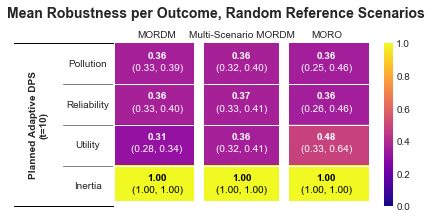

In [98]:
labels = []
for dim, row in pivot.index: 
    labelset = []
    for col in pivot.columns:
        l = statFrame.loc[(dim, col),(row,'ci_low')]
        h = statFrame.loc[(dim, col),(row,'ci_high')]
        m = statFrame.loc[(dim, col),(row,'mean')]
        
#         label = r'$\bf{' + '{0:.2f}'.format(m) + "}$" + '\n(' + '{0:.2f}'.format(l) + ', ' + '{0:.2f}'.format(h) + ')'
        label = ('{0:.2f}'.format(m),'(' + '{0:.2f}'.format(l) + ', ' + '{0:.2f}'.format(h) + ')')
        labelset.append(label)
    labels.append(labelset)

fig = buildCumulativeHeatmap(pivot, labels=np.array(labels))